In [36]:
import io
import requests
import statsmodels.api as sm
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

In [13]:
df = pd.read_csv('./m_quote.csv', encoding='shift-jis', header=1)

In [14]:
df.head()

,Unnamed: 0,USD,GBP,EUR,CAD,CHF,SEK,DKK,NOK,AUD,...,HUF,CZK,PLN,TRY,IDR(100).1,CNY.1,MYR.1,KRW(100).1,TWD,RUB
0,2002/4/30,131.15,189.01,115.97,82.83,79.13,12.73,15.61,15.20,70.24,...,*****,*****,*****,NaN,1.39,15.84,*****,9.99,3.77,NaN
1,2002/5/31,126.44,184.56,115.88,81.58,79.60,12.57,15.59,15.43,69.58,...,*****,*****,*****,NaN,1.41,15.28,*****,10.10,3.68,NaN
2,2002/6/28,123.53,183.00,117.83,80.64,80.09,12.94,15.86,15.92,70.29,...,*****,*****,*****,NaN,1.44,14.93,*****,10.20,3.66,NaN
3,2002/7/31,118.05,183.64,117.23,76.52,80.16,12.67,15.79,15.83,65.42,...,*****,*****,*****,NaN,1.34,14.26,*****,9.98,3.56,NaN
4,2002/8/30,119.08,183.14,116.45,75.85,79.60,12.59,15.69,15.68,64.47,...,*****,*****,*****,NaN,1.35,14.39,*****,9.97,3.53,NaN


ShapiroResult(statistic=0.9602667689323425, pvalue=1.8999778603756567e-06)
ShapiroResult(statistic=0.9833336472511292, pvalue=0.0047866241075098515)


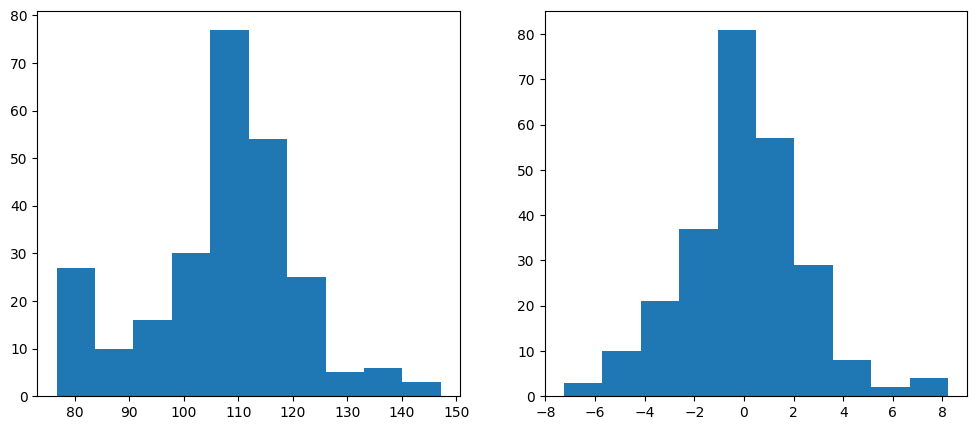

In [35]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

ax[0].hist(df.USD)

df_diff1 = df.USD.diff().dropna()
ax[1].hist(df_diff1)

print(stats.shapiro(df.USD.values))
print(stats.shapiro(df_diff1.values))

In [38]:
url = 'https://www.analyticsvidhya.com/wp-content/uploads/2016/02/AirPassengers.csv'
stream = requests.get(url).content
df_content = pd.read_csv(io.StringIO(stream.decode('utf-8')))
passengers = df_content['#Passengers']

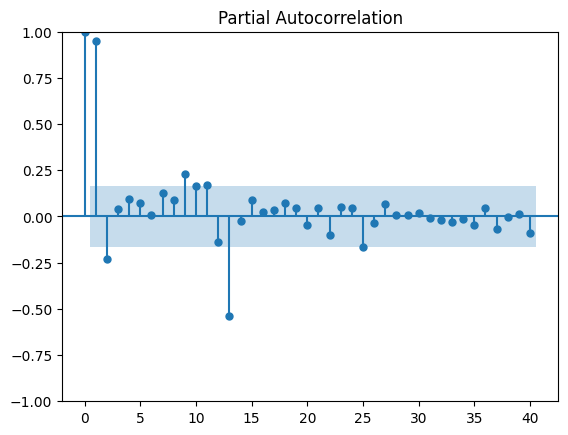

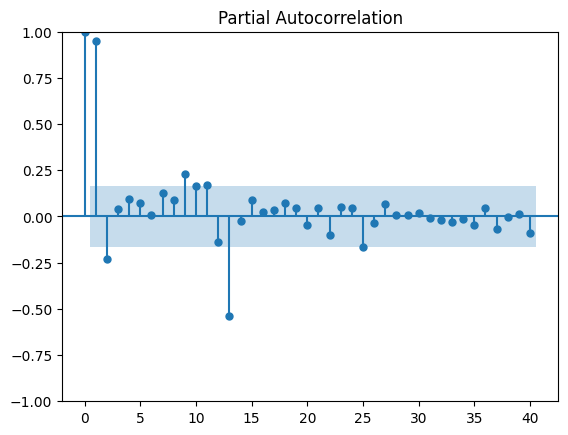

In [48]:
p_acf = sm.tsa.stattools.pacf(passengers)
sm.graphics.tsa.plot_pacf(passengers, lags=40)

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.23089D+00    |proj g|=  2.21083D-01

At iterate    5    f=  1.65003D+00    |proj g|=  2.76169D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      6     14      1     0     0   6.135D-07   1.650D+00
  F =   1.6500283328422514     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


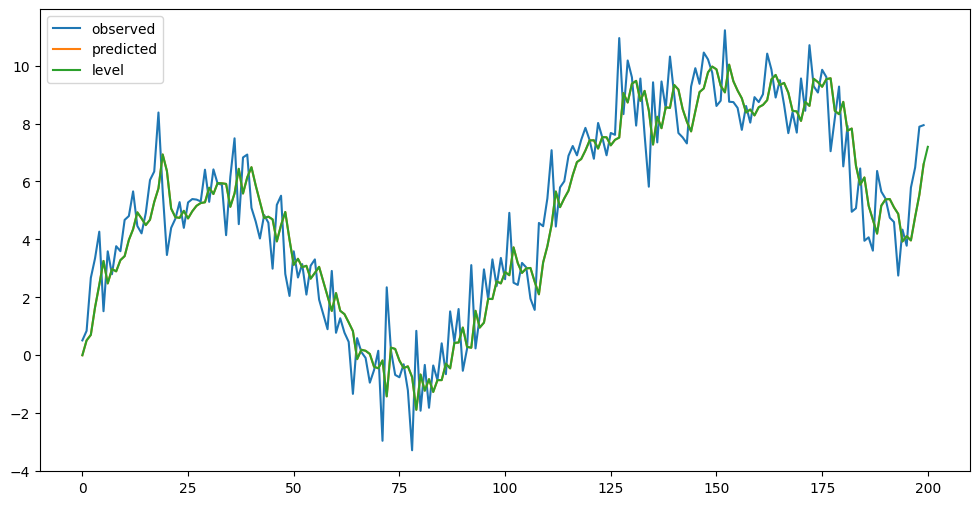

In [1]:
import numpy as np
import pandas as pd
from statsmodels.tsa.statespace.structural import UnobservedComponents
import matplotlib.pyplot as plt

# 何らかの時系列データを作成
np.random.seed(0)
n = 200
mu = np.random.normal(0, 0.5, size=n).cumsum()
Y = mu + np.random.normal(0, 1, size=n)

# ローカルレベルモデルを適用
model = UnobservedComponents(Y, 'local level')
result = model.fit()

# 結果を予測とプロット
predicted_state = result.predicted_state
predicted_Y = result.predict()

plt.figure(figsize=(12,6))
plt.plot(Y, label='observed')
plt.plot(predicted_Y, label='predicted')
plt.plot(predicted_state[0], label='level')
plt.legend(loc='upper left')
plt.show()
